
Quantidade de execuções de cada algoritmo: 10

Tempo de Execução (Melhor Caso):
   Tamanho  Quicksort (s)  Heapsort (s)  Shellsort (s)
0      500       0.002032      0.000831       0.000202
1     5000       0.154764      0.011154       0.003417
2    10000       0.617940      0.024859       0.007660
3    30000       5.219894      0.083989       0.025181

Tempo de Execução (Pior Caso):
   Tamanho  Quicksort (s)  Heapsort (s)  Shellsort (s)
0      500       0.000403      0.000722       0.000360
1     5000       0.005543      0.009800       0.005790
2    10000       0.011827      0.021710       0.013158
3    30000       0.040261      0.077048       0.042396

Número de Comparações (Melhor Caso):
   Tamanho    Quicksort  Heapsort  Shellsort
0      500      42184.0    7756.0     3506.0
1     5000    4171766.0  112126.0    55005.0
2    10000   16676765.0  244460.0   120005.0
3    30000  150030475.0  826347.0   390007.0

Número de Comparações (Pior Caso):
   Tamanho  Quicksort  Heapsort  Shell

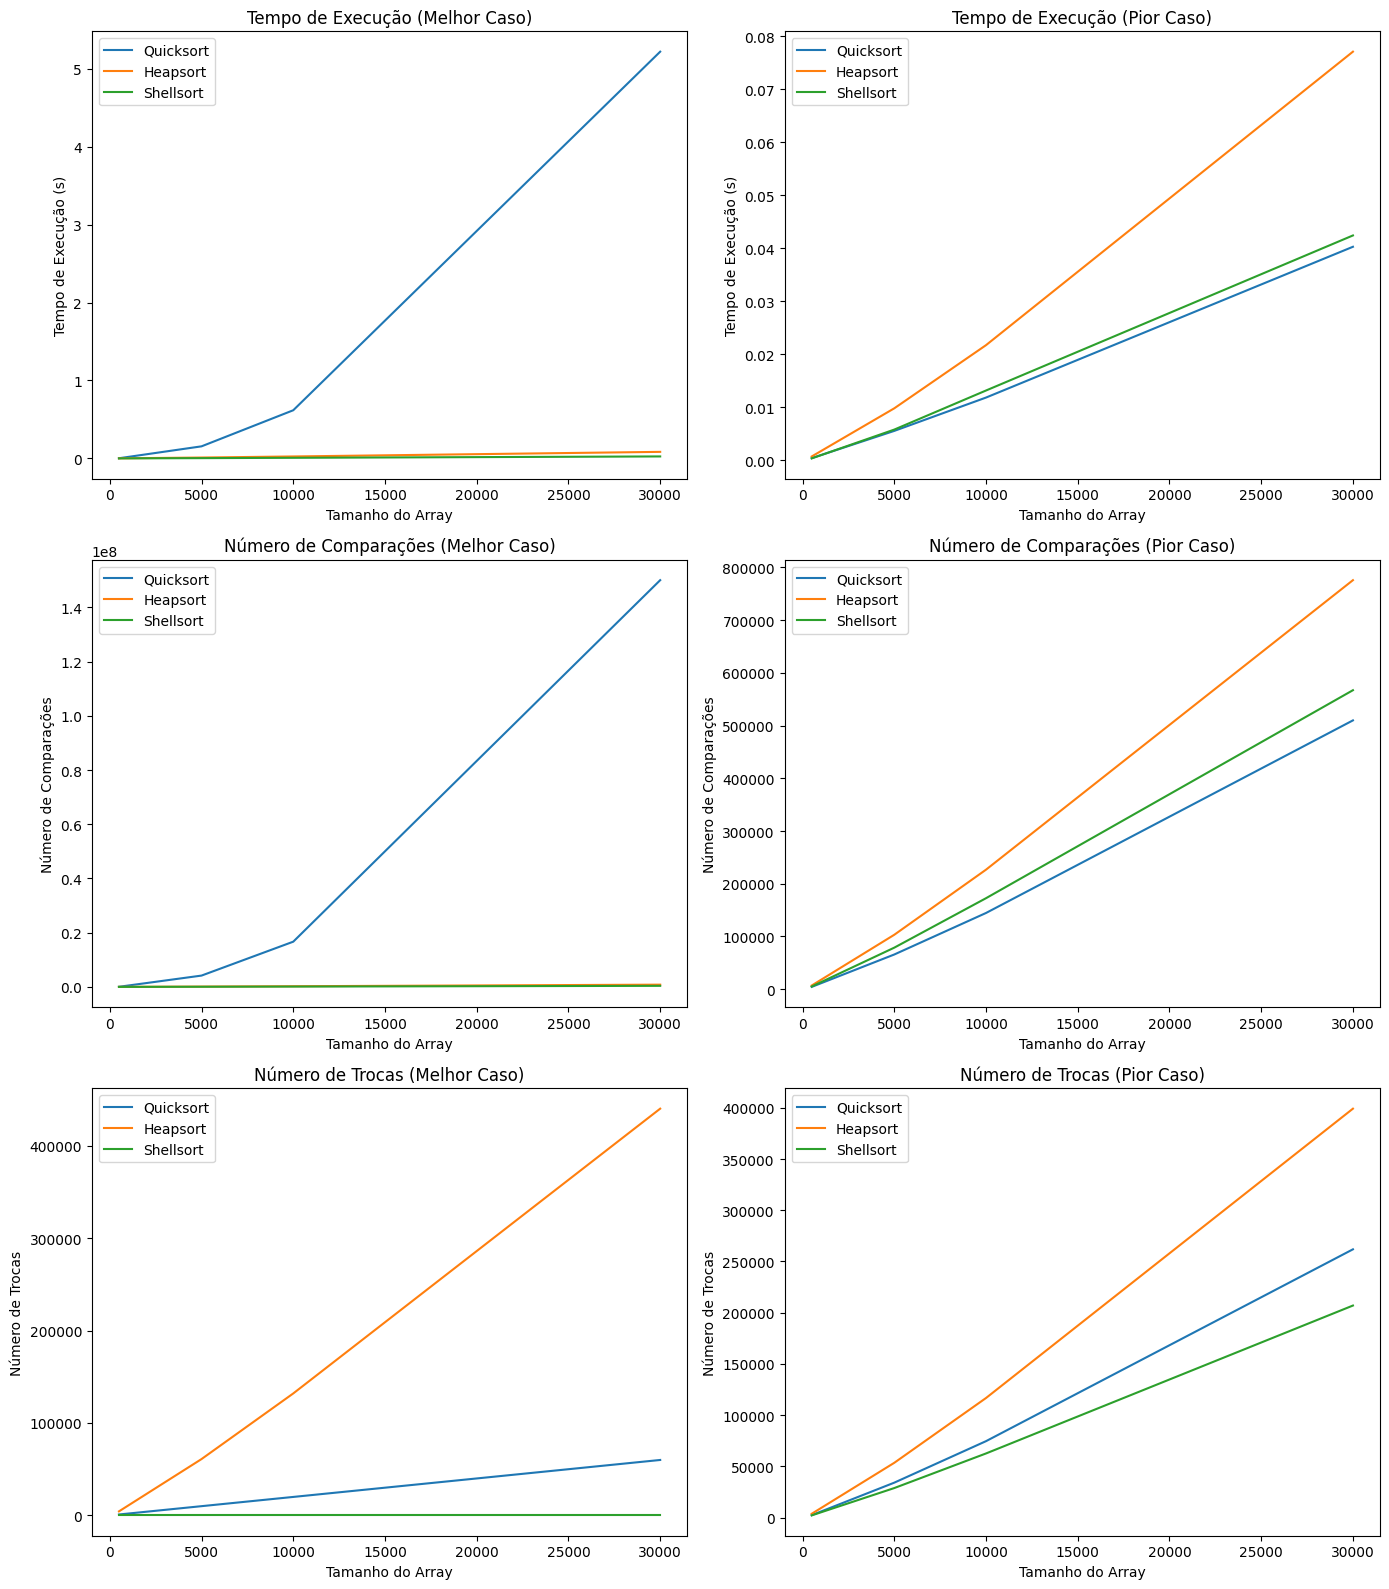

In [14]:
#Questão 8 - lista 5
# O objetivo desse exercício é fazer um estudo comparativo entre os  algoritmos de ordenação Quicksort, Heapsort e Shellsort.
# Segue implementação dos algoritmos de ordenação e a função testar_algoritmos_de_ordenacao que compara o tempo de execução, número de comparações e número de trocas entre os algoritmos.

import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.setrecursionlimit(100000)

def quicksort(arr):
    comparacoes = 0
    trocas = 0

    def particao(baixo, alto):
        nonlocal comparacoes, trocas
        meio = (baixo + alto) // 2
        pivo = sorted([arr[baixo], arr[meio], arr[alto]])[1]
        i = baixo - 1
        for j in range(baixo, alto):
            comparacoes += 1
            if arr[j] < pivo:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
                trocas += 1
        arr[i + 1], arr[alto] = arr[alto], arr[i + 1] #troca o pivo com o elemento na posição i + 1
        trocas += 1
        return i + 1

    def quicksort_recursivo(baixo, alto):
        if baixo < alto:
            pi = particao(baixo, alto)
            quicksort_recursivo(baixo, pi - 1) #ordena a partição esquerda
            quicksort_recursivo(pi + 1, alto) #ordena a partição direita

    quicksort_recursivo(0, len(arr) - 1)
    return comparacoes, trocas

def heapsort(arr):
    comparacoes = 0
    trocas = 0

    def heapify(n, i):
        nonlocal comparacoes, trocas
        maior = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n:
            comparacoes += 1
            if arr[l] > arr[maior]:
                maior = l

        if r < n:
            comparacoes += 1
            if arr[r] > arr[maior]:
                maior = r

        if maior != i:
            arr[i], arr[maior] = arr[maior], arr[i]
            trocas += 1
            heapify(n, maior)

    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        trocas += 1
        heapify(i, 0)

    return comparacoes, trocas

def shellsort(arr):
    comparacoes = 0
    trocas = 0
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap:
                comparacoes += 1
                if arr[j - gap] > temp:
                    arr[j] = arr[j - gap]
                    trocas += 1
                    j -= gap
                else:
                    break
            arr[j] = temp
        gap //= 2
    return comparacoes, trocas

def gerar_melhores_casos(size):
    return list(range(size))

def gerar_piores_casos(size):
    return list(range(size, 0, -1))

def testar_algoritmos_de_ordenacao():
    sizes = [500, 5000, 10000, 30000]
    algoritmos = {
        "Quicksort": quicksort,
        "Heapsort": heapsort,
        "Shellsort": shellsort
    }
    
    quantidade_de_execucoes = 10  # Número de execuções para calcular a média

    tempo_melhores_casos = {name: [] for name in algoritmos}
    tempo_piores_casos = {name: [] for name in algoritmos}
    comparacoes_melhores_casos = {name: [] for name in algoritmos}
    comparacoes_piores_casos = {name: [] for name in algoritmos}
    trocas_melhores_casos = {name: [] for name in algoritmos}
    trocas_piores_casos = {name: [] for name in algoritmos}

    for size in sizes:
        for name, algoritmo in algoritmos.items():
            # Melhor caso
            tempo_total = 0
            total_comparacoes = 0
            total_trocas = 0
            for _ in range(quantidade_de_execucoes):
                arr = gerar_melhores_casos(size)
                incio_tempo = time.time()
                comparacoes, trocas = algoritmo(arr.copy())
                fim_tempo = time.time()

                tempo_total += fim_tempo - incio_tempo
                total_comparacoes += comparacoes
                total_trocas += trocas

            medias_de_tempo = tempo_total / quantidade_de_execucoes
            medias_comparacoes = total_comparacoes / quantidade_de_execucoes
            medias_trocas = total_trocas / quantidade_de_execucoes

            tempo_melhores_casos[name].append(medias_de_tempo)
            comparacoes_melhores_casos[name].append(medias_comparacoes)
            trocas_melhores_casos[name].append(medias_trocas)

            # Pior caso
            tempo_total = 0
            total_comparacoes = 0
            total_trocas = 0
            for _ in range(quantidade_de_execucoes):
                arr = gerar_piores_casos(size)
                incio_tempo = time.time()
                comparacoes, trocas = algoritmo(arr.copy())
                fim_tempo = time.time()

                tempo_total += fim_tempo - incio_tempo
                total_comparacoes += comparacoes
                total_trocas += trocas

            medias_de_tempo = tempo_total / quantidade_de_execucoes
            medias_comparacoes = total_comparacoes / quantidade_de_execucoes
            medias_trocas = total_trocas / quantidade_de_execucoes

            tempo_piores_casos[name].append(medias_de_tempo)
            comparacoes_piores_casos[name].append(medias_comparacoes)
            trocas_piores_casos[name].append(medias_trocas)
    
    print(f"\nQuantidade de execuções de cada algoritmo: {quantidade_de_execucoes}\n")
    
    # Cria tabelas comparativas
    df_tempo_melhores = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name} (s)": tempo_melhores_casos[name] for name in algoritmos}
    })
    
    df_tempo_piores = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name} (s)": tempo_piores_casos[name] for name in algoritmos}
    })
    
    df_comparacoes_melhores = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": comparacoes_melhores_casos[name] for name in algoritmos}
    })
    
    df_comparacoes_piores = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": comparacoes_piores_casos[name] for name in algoritmos}
    })
    
    df_trocas_melhores = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": trocas_melhores_casos[name] for name in algoritmos}
    })
    
    df_trocas_piores = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": trocas_piores_casos[name] for name in algoritmos}
    })
    
    print("Tempo de Execução (Melhor Caso):")
    print(df_tempo_melhores)
    print("\nTempo de Execução (Pior Caso):")
    print(df_tempo_piores)
    print("\nNúmero de Comparações (Melhor Caso):")
    print(df_comparacoes_melhores)
    print("\nNúmero de Comparações (Pior Caso):")
    print(df_comparacoes_piores)
    print("\nNúmero de Trocas (Melhor Caso):")
    print(df_trocas_melhores)
    print("\nNúmero de Trocas (Pior Caso):")
    print(df_trocas_piores)

    # Plotagem dos gráficos
    plt.figure(figsize=(14, 16))

    plt.subplot(3, 2, 1)
    for name in algoritmos:
        plt.plot(sizes, tempo_melhores_casos[name], label=name)
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Tempo de Execução (s)')
    plt.title('Tempo de Execução (Melhor Caso)')
    plt.legend()

    plt.subplot(3, 2, 2)
    for name in algoritmos:
        plt.plot(sizes, tempo_piores_casos[name], label=name)
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Tempo de Execução (s)')
    plt.title('Tempo de Execução (Pior Caso)')
    plt.legend()

    plt.subplot(3, 2, 3)
    for name in algoritmos:
        plt.plot(sizes, comparacoes_melhores_casos[name], label=name)
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Número de Comparações')
    plt.title('Número de Comparações (Melhor Caso)')
    plt.legend()

    plt.subplot(3, 2, 4)
    for name in algoritmos:
        plt.plot(sizes, comparacoes_piores_casos[name], label=name)
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Número de Comparações')
    plt.title('Número de Comparações (Pior Caso)')
    plt.legend()

    plt.subplot(3, 2, 5)
    for name in algoritmos:
        plt.plot(sizes, trocas_melhores_casos[name], label=name)
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Número de Trocas')
    plt.title('Número de Trocas (Melhor Caso)')
    plt.legend()

    plt.subplot(3, 2, 6)
    for name in algoritmos:
        plt.plot(sizes, trocas_piores_casos[name], label=name)
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Número de Trocas')
    plt.title('Número de Trocas (Pior Caso)')
    plt.legend()

    plt.tight_layout()
    plt.show()

testar_algoritmos_de_ordenacao()